<a href="https://colab.research.google.com/github/Shahbaazmohd/CodSoft/blob/main/Task_1(MovieGenre).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive", timeout_ms=300000)

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the training data
train_path = "/content/drive/MyDrive/CodSoft/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [ ]:
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [ ]:
train_data.isnull().sum()

,0
Title,0
Genre,0
Description,0


In [ ]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
train_data.isnull().sum()

,0
Title,0
Genre,0
Description,0


In [ ]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
test_path = "/content/drive/MyDrive/CodSoft/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [ ]:
test_data.head()

,Title,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
test_data.describe()

,Title
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


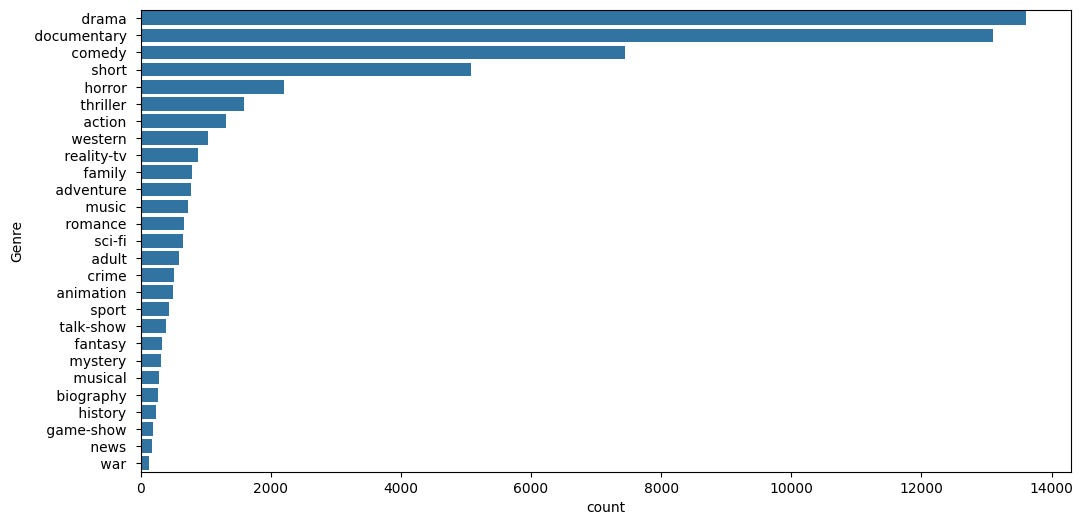

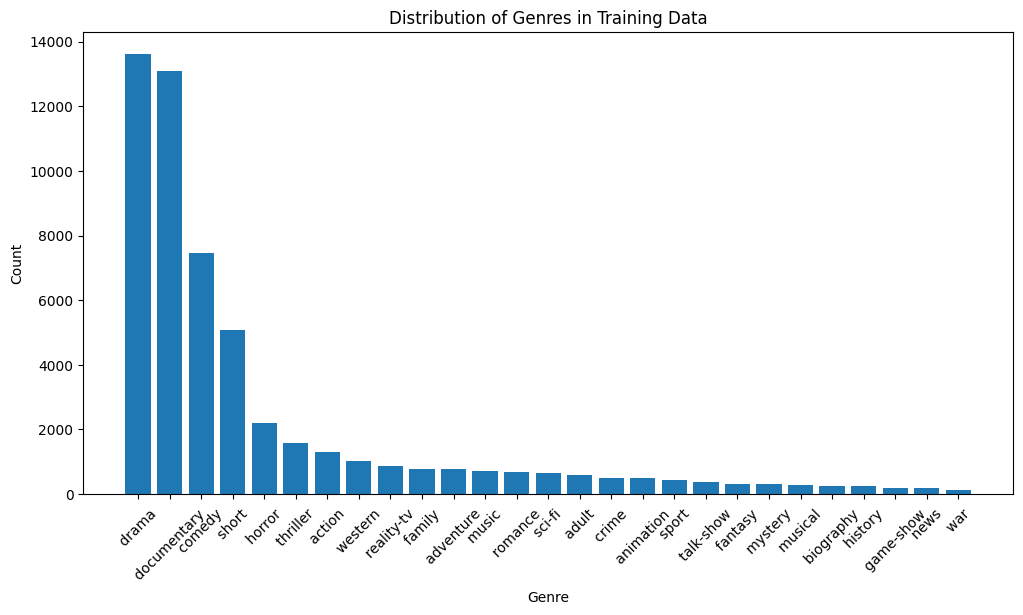

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data = train_data, y='Genre', order=train_data['Genre'].value_counts().index)
plt.figure(figsize=(12, 6))
counts = train_data['Genre'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribution of Genres in Training Data')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show;

In [ ]:
import nltk

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
import string

# Initialize the stemmer and stopwords
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove Twitter handles (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove image URLs (e.g., pic.twitter.com)
    text = re.sub(r'pic\.\S+', '', text)

    # Remove any characters that are not letters
    text = re.sub(r"[^a-zA-Z\s']", '', text)

    # Remove single-character words
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove punctuation
    text = ''.join([i for i in text if i not in string.punctuation])

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords and stem the remaining words
    text = " ".join([stemmer.stem(i) for i in words if i not in stop_words and len(i) > 2])

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the cleaning function to the train and test datasets
train_data['Text_cleaning'] = train_data['Description'].apply(clean_text)
test_data['Text_cleaning'] = test_data['Description'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


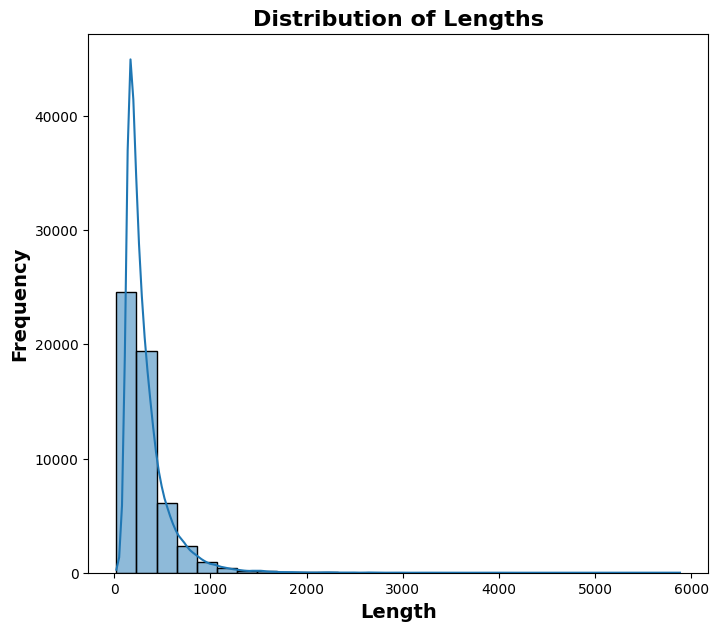

In [ ]:
# Calculate the length of the cleaned text
train_data['length_Text_cleaning'] = train_data['Text_cleaning'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(train_data, x='length_Text_cleaning', bins=28, kde=True)

# Set the labels and title
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the training and test data
X_train = tfidf_vectorizer.fit_transform(train_data['Text_cleaning'])
X_test = tfidf_vectorizer.transform(test_data['Text_cleaning'])

# Set the target variable
y = train_data['Genre']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Calculate and print the validation accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

# Print the classification report
print(classification_report(y_val, y_pred))

# Make predictions on the test set
test_predictions = classifier.predict(X_test)

# Add predictions to the test_data DataFrame
test_data['Predicted_Genre'] = test_predictions

# Save the test data with predictions to a CSV file
test_data.to_csv('test_data_with_predictions.csv', index=False)

# Print the test data with predictions
print(test_data)


Validation Accuracy: 0.4361339112791663
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.67      0.03      0.05      1443
       crime        0.00      0.00      0.00       107
 documentary        0.52      0.88      0.66      2659
       drama        0.37      0.87      0.52      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00